# Our First CNN in Keras 
### Creating a model based on the MNIST Dataset of Handwrittent Digits

### Step 1: Lets load our dataset

In [ ]:
from keras.datasets import mnist

# LOAD THE mnist dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

print (x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


### Step 2A: Examine the size and image dimenions (not required but good practice)
- Check the number of samples, dimenions and whether images are color or grayscale
- We see that our training data consist of **60,000** samples of training data, **10,000** samples of test data
- Our labels are appropriately sized as well
- Our Image dimenions are **28 x 28**, with **no color channels** (i.e. they are grayscale, so no BGR channels)

In [ ]:
# printing the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))
print()
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print()
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)

Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


### Step 2B - Let's take a look at some of images in this dataset
- Using OpenCV
- Using Matplotlib

In [ ]:
# USING OpenCV
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow

# USE OpenCV TO DISPLAY 6 RANDOM IMAGES FROM THE DATASET
for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    window_name = 'Random Sample #' + str(i)
    cv2_imshow(img)
    cv2.waitKey(0)

cv2.destroyAllWindows()   

### Let's do the same thing but using matplotlib to plot 6 images

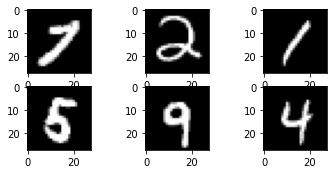

In [ ]:
import matplotlib.pyplot as plt

# PLOTS 6 IMAGES
# note subplot's arugments are -- nrows,ncols,index
# WE SET THE COLOR TO GRAY SINCE OUR IMAGE DATASET IS GRAYSCALE
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.show()

### Step 3A - Prepare our dataset for training

In [ ]:
# STORE THE no. OF ROWS & COLUMNS
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# GETTING OUR DATA IN THE RIGHT 'shape' NEEDED FOR Keras
# WW NEED TO ADD A 4th DIMENSION TO OUR DATA, THEREBY CHANGING THE ORIGINAL IMG SHAPE (60000,28,28) TO (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# STORE THE SHAPE OF SINGLE IMAGE
input_shape = (img_rows, img_cols, 1)

# CHANGE IMAGE TYPE TO float32 DATA TYPE
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# NORMALIZE DATA BY CHANGING THE RANGE FROM (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Step 3B - One Hot Encode our Labels (Y)

In [ ]:
from keras.utils import np_utils

# NOW WE ONE HOT ENCODE THE OUTPUTS
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# COUNT THE no. OF COLUMNS IN OUR ONE HOT ENCODED MATRIX 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Step 4 - Create Our Model
- We're constructing a simple but effective CNN that uses 32 filters of size 3x3
- We've added a 2nd CONV layer of 64 filters of the same size 3x2
- We then downsample our data to 2x2, here he apply a dropout where p is set to 0.25
- We then flatten our Max Pool output that is connected to a Dense/FC layer that has an output size of 128
- How we apply a dropout where P is set to 0.5
- Thus 128 output is connected to another FC/Dense layer that outputs to the 10 categorical units

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.optimizers import SGD 

# CREATE MODEL
# SEQUENTIAL = 1 LAYER ON TOP OF OTHER LAYER in SEQUENCE
model = Sequential()

# ADD LAYER
# 32 filters added on image
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLAT FROM 3D TO 1D to create FULLY CONNECTED LAYER
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01), #learning rate is 0.1
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

### Step 5 - Train our Model
- We place our formatted data as the inputs and set the batch size, number of epochs
- We store our model's training results for plotting in future
- We then use Kera's model.evaluate function to output the model's find performance. Here we are examining Test Loss and Test Accuracy

In [ ]:
batch_size = 32
epochs = 10

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# evaluate -- to calculate score
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 164s 87ms/step - loss: 0.5614 - accuracy: 0.8246 - val_loss: 0.1947 - val_accuracy: 0.9430
Epoch 2/10
1875/1875 [==============================] - 164s 88ms/step - loss: 0.2918 - accuracy: 0.9116 - val_loss: 0.1430 - val_accuracy: 0.9569
Epoch 3/10
1875/1875 [==============================] - 164s 87ms/step - loss: 0.2212 - accuracy: 0.9333 - val_loss: 0.1051 - val_accuracy: 0.9692
Epoch 4/10
1875/1875 [==============================] - 164s 87ms/step - loss: 0.1714 - accuracy: 0.9484 - val_loss: 0.0829 - val_accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 164s 87ms/step - loss: 0.1401 - accuracy: 0.9578 - val_loss: 0.0672 - val_accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 164s 87ms/step - loss: 0.1214 - accuracy: 0.9638 - val_loss: 0.0581 - val_accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 163s 87ms/step - loss: 0.1072 - accuracy: 0.9683 - val_loss: 0

### Step 6 - Ploting our Loss and Accuracy Charts

In [ ]:
history_dict = history.history
history_dict

{'accuracy': [0.82464998960495,
  0.9115833044052124,
  0.9332666397094727,
  0.948366641998291,
  0.9577500224113464,
  0.9637666940689087,
  0.9683499932289124,
  0.9712499976158142,
  0.9735333323478699,
  0.9757333397865295],
 'loss': [0.5613548159599304,
  0.2918260395526886,
  0.22122740745544434,
  0.1714373379945755,
  0.1401463896036148,
  0.12140527367591858,
  0.10715533047914505,
  0.09380567818880081,
  0.08934346586465836,
  0.08039185404777527],
 'val_accuracy': [0.9430000185966492,
  0.9569000005722046,
  0.9692000150680542,
  0.9746000170707703,
  0.9786999821662903,
  0.9805999994277954,
  0.982699990272522,
  0.9847000241279602,
  0.986299991607666,
  0.9868999719619751],
 'val_loss': [0.19471509754657745,
  0.14298009872436523,
  0.10511557757854462,
  0.08292237669229507,
  0.06724966317415237,
  0.05806233361363411,
  0.05419997125864029,
  0.04749298095703125,
  0.04231744259595871,
  0.04128406569361687]}

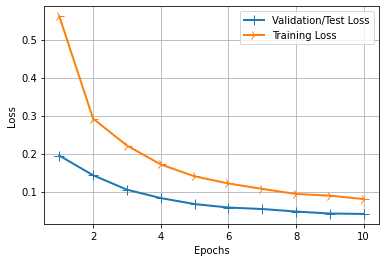

In [ ]:
# PLOTTING LOSS CHARTS
import matplotlib.pyplot as plt

#model name.history
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

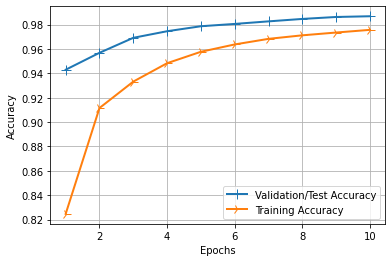

In [ ]:
# PLOTTING ACCURACY CHARTS
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy'] #val_acc=test accuracy
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

### Step 7A - Saving our Model

In [ ]:
model.save("MNISTcnnModel.h5")
print("Model Saved")

Model Saved


### Step 7B - Loading  our Model

In [ ]:
from keras.models import load_model

classifier = load_model('MNISTcnnModel.h5')

### Step 8 - Lets input some of our test data into our classifer

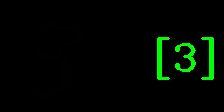

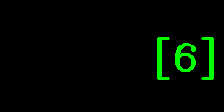

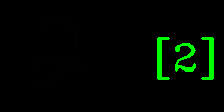

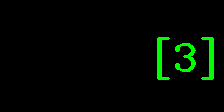

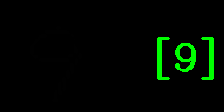

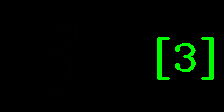

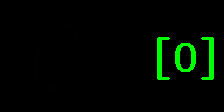

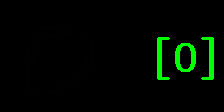

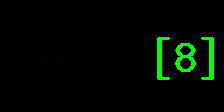

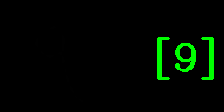

In [ ]:
import cv2
import numpy as np

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,2, (0,255,0), 2)
    #cv2_imshow(name)
    cv2_imshow(expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = classifier.predict(input_im, 1, verbose = 0)
    res1 = np.argmax(res,axis=1)

    draw_test("Prediction", res1, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()